# Oasis Infobyte 
# Data Science Internship
# Bushra Rahman
# Task - 1 Iris Flower Classification


Iris flower has three species; setosa, versicolor, and virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Importing dataset

In [2]:
data = pd.read_csv("iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [9]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
data.shape

(150, 6)

# Data visualization


In [11]:
#Pair Plot

C:\Users\Bushra\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


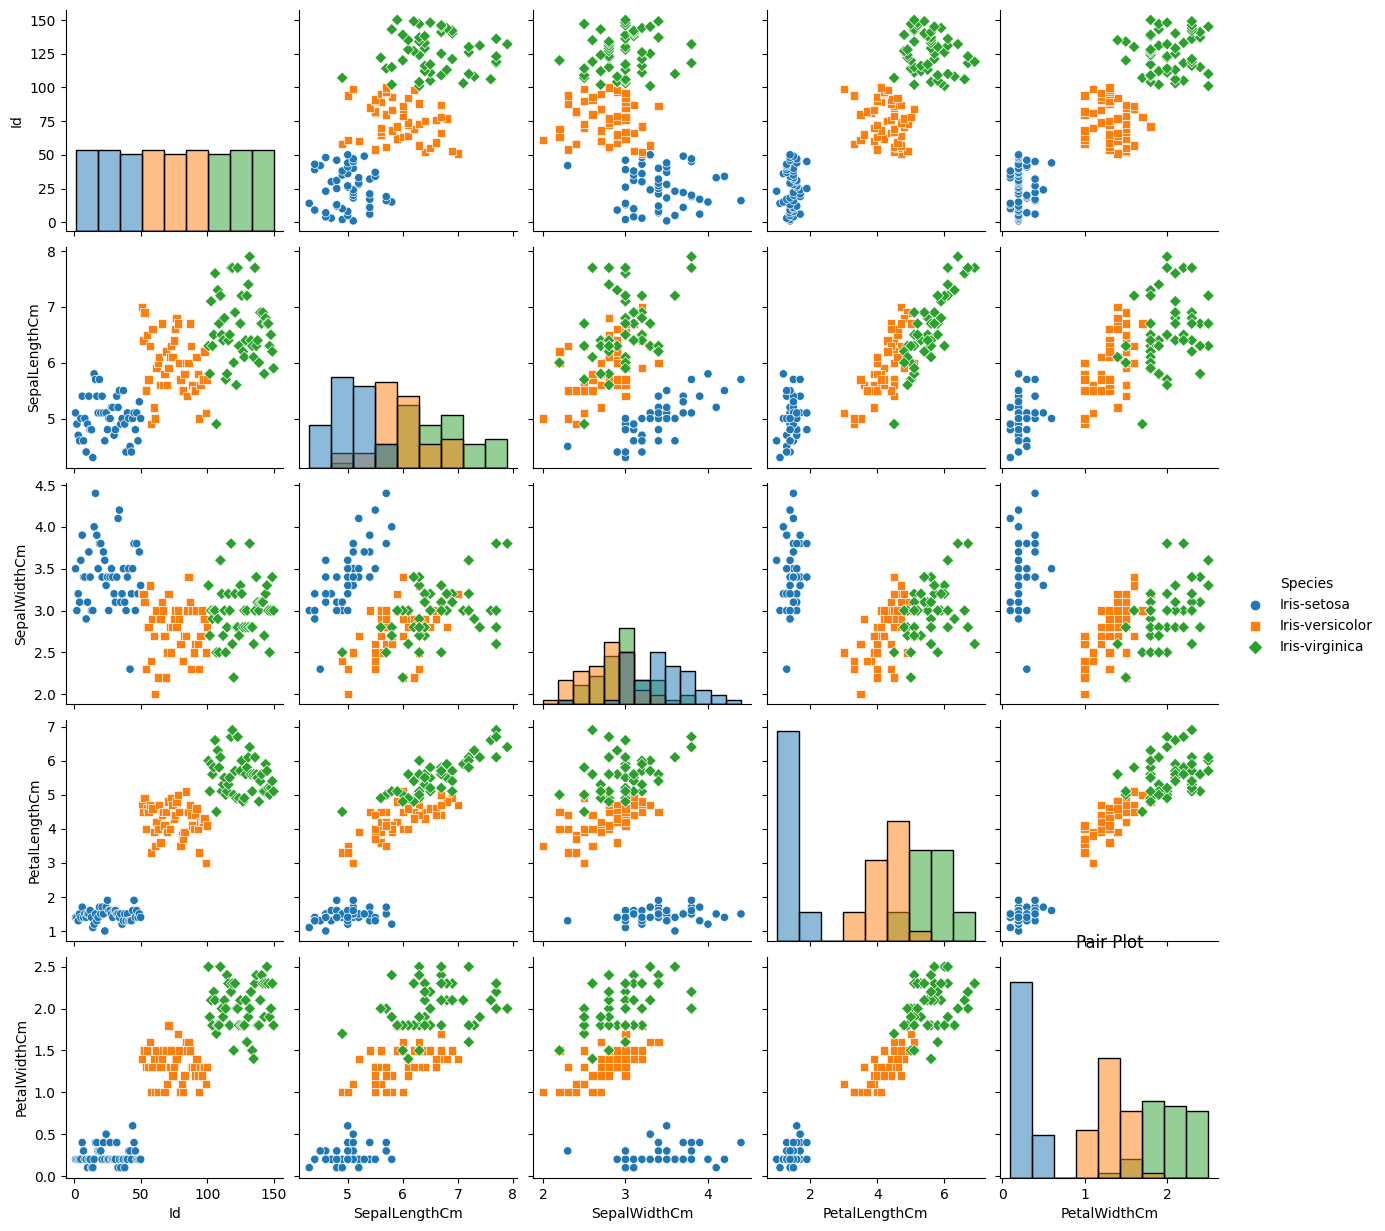

In [12]:
sns.pairplot(data, hue='Species',diag_kind='hist',markers = ['o','s','D'])
plt.title('Pair Plot')
plt.show()

In [13]:
#Bar graph representation

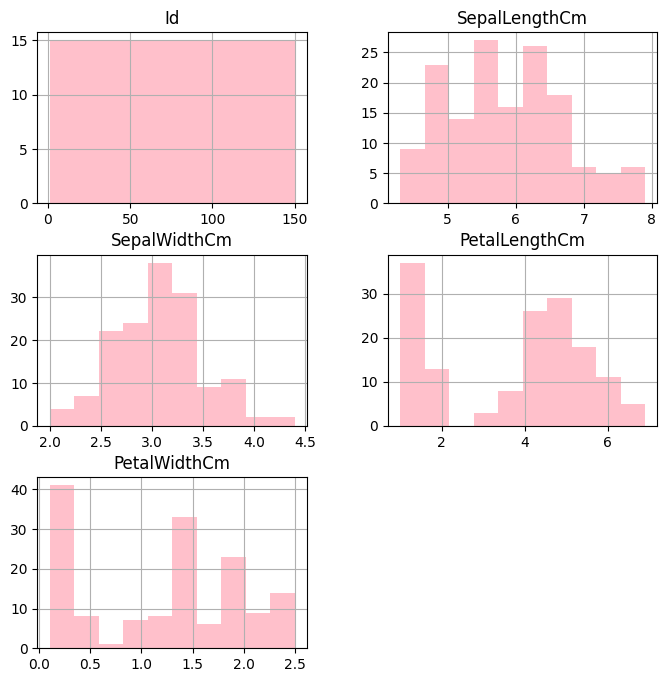

In [14]:
data.hist(figsize=(8,8),color= 'pink')
plt.show()

# Splitting the data into input features (x) and target labels (y)

In [15]:
x = data.iloc[:,1:5].values
y = data.iloc[:,5].values

In [16]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [17]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

# Label  Encoding 

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lab_encoder = LabelEncoder()
y = lab_encoder.fit_transform(y)

In [20]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Splitting the data into training and testing sets

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [23]:
x_train

array([[6.2, 2.8, 4.8, 1.8],
       [5.1, 3.3, 1.7, 0.5],
       [5.6, 2.9, 3.6, 1.3],
       [7.7, 3.8, 6.7, 2.2],
       [5.4, 3. , 4.5, 1.5],
       [5.8, 4. , 1.2, 0.2],
       [6.4, 2.8, 5.6, 2.2],
       [6.1, 3. , 4.6, 1.4],
       [5.5, 2.3, 4. , 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.2, 2.9, 4.3, 1.3],
       [6.8, 3.2, 5.9, 2.3],
       [5. , 2.3, 3.3, 1. ],
       [4.8, 3.4, 1.6, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.2, 3.4, 1.4, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [5.1, 3.5, 1.4, 0.2],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [6.2, 3.4, 5.4, 2.3],
       [7.9, 3.8, 6.4, 2. ],
       [5.4, 3.4, 1.7, 0.2],
       [6.7, 3.1, 5.6, 2.4],
       [6.3, 3.4, 5.6, 2.4],
       [7.6, 3. , 6.6, 2.1],
       [6. , 2.2, 5. , 1.5],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.7, 2.8, 4.1, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [7.7, 3

In [24]:
#Number of ROWS and COLUMNS for training and testing

In [25]:
x_train.shape

(120, 4)

In [26]:
x_test.shape

(30, 4)

In [27]:
y_train.shape

(120,)

In [28]:
y_test.shape

(30,)

# Prediction using SVM Algorithm

In [29]:
#Training the SVM model

In [30]:
svm_classifier_linear=SVC(kernel='linear')
svm_classifier_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [31]:
#Make predictions on the test set
y_pred = svm_classifier_linear.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(y_test, y_pred)
con_mat

array([[14,  0,  0],
       [ 0,  8,  0],
       [ 0,  0,  8]], dtype=int64)

In [33]:
#Evaluate the model's accuracy
accuracy = accuracy_score(y_test,y_pred)*100

In [34]:
print("Model's accuracy :", accuracy)

Model's accuracy : 100.0


# Classification Report

In [35]:
from sklearn.metrics import classification_report

In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Visualizing the result

<function matplotlib.pyplot.show(close=None, block=None)>

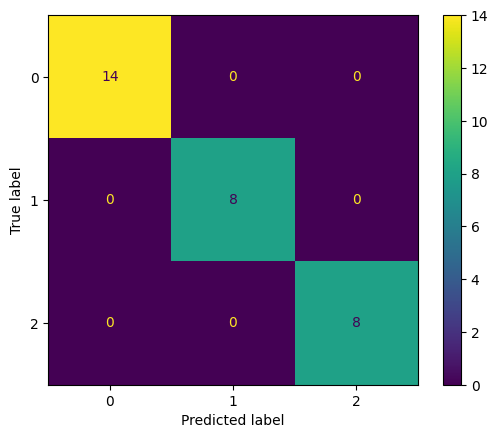

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=ConfusionMatrixDisplay(con_mat)
cm.plot()
plt.show

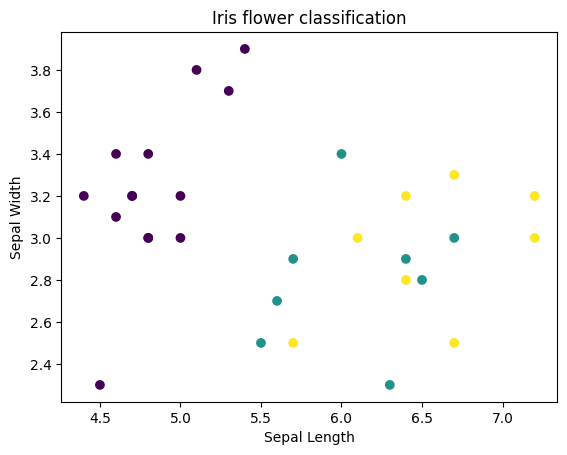

In [38]:
plt.scatter(x_test[:,0],x_test[:,1],c=y_pred)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris flower classification')
plt.show()